In [1]:
pip install missingno

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import plotly.express as px
from pandas import plotting
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [3]:
# Loading the data.
data=pd.read_csv('Leads.csv')

### Data processing and EDA

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [8]:
# Replacing 'Select' with NaN 
data = data.replace('Select',np.nan)

In [9]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# we dont need data with only a single variable in it, so dropping them
data= data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                           'Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking for duplicates if any
datacopy = data
# Let's drop the duplicates if any
datacopy.drop_duplicates(subset=None, inplace=True)
datacopy.shape

(9240, 32)

In [12]:
#we see that there are no duplicates in the data

In [13]:
#checking for null values
data.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Through Recommendations                             0
A free copy of Mastering The

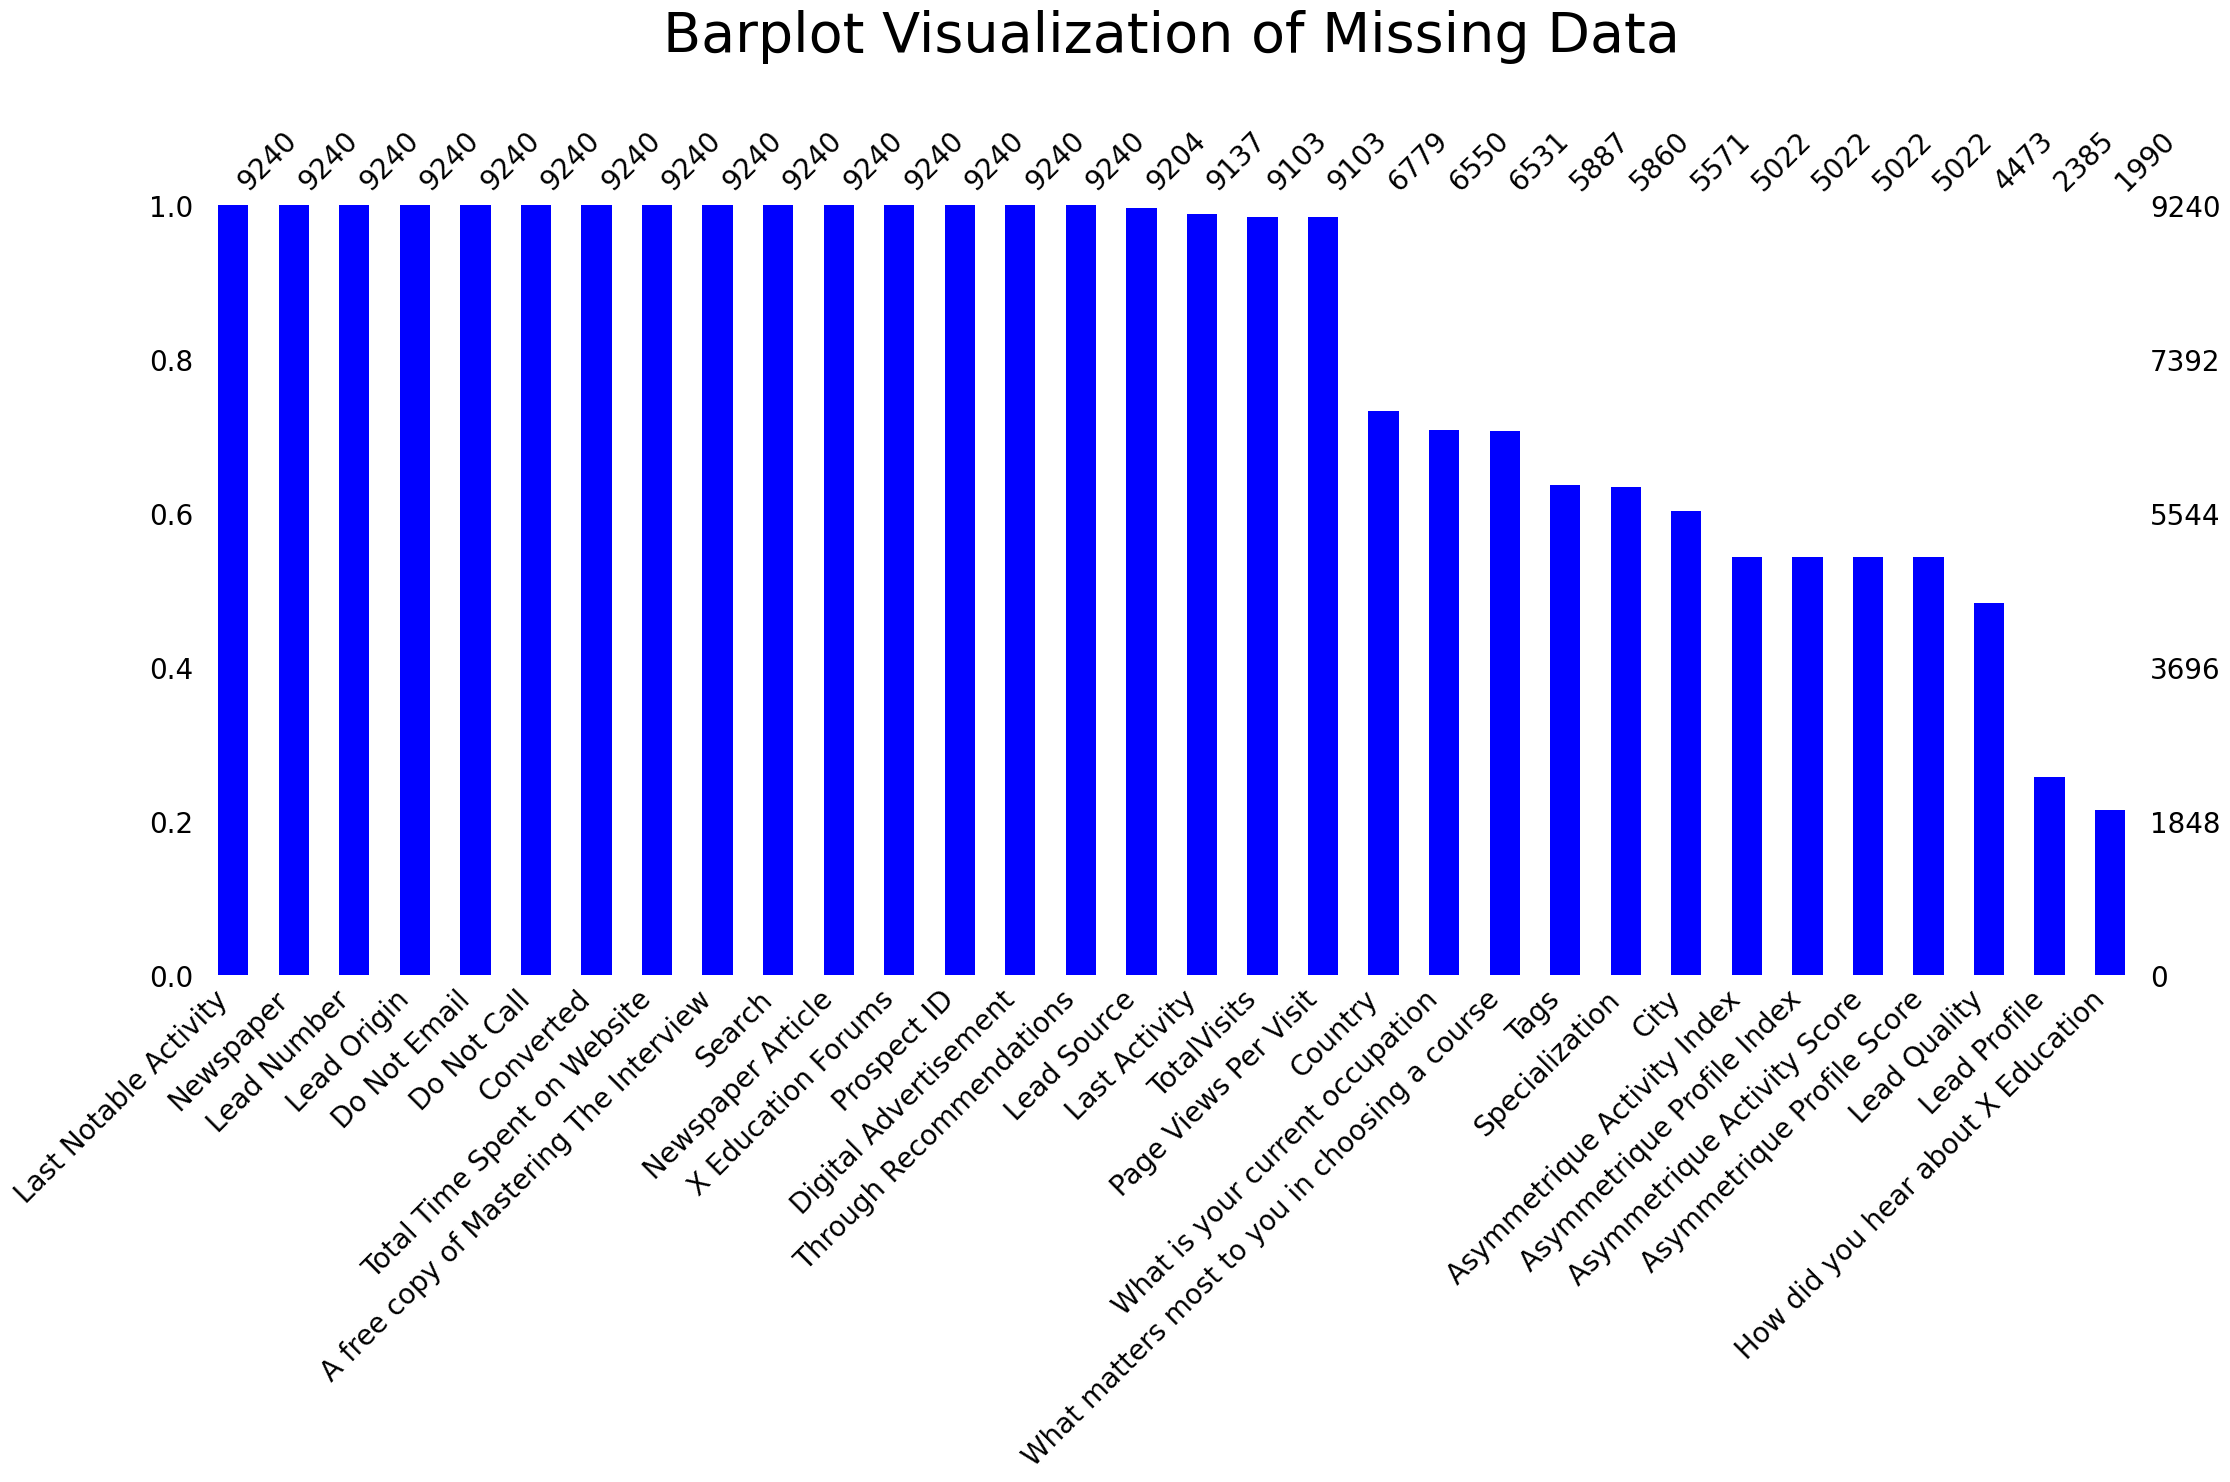

In [14]:
#showing the completeness of the data
ms.bar(data, color = ('blue'), sort = 'descending', fontsize=20)
plt.title('Barplot Visualization of Missing Data\n', fontsize=40)
plt.show()

In [15]:
# we can see that there are many columns with incomplete data, finding its percentage
round(100*(data.isnull().sum())/len(data.index),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [16]:
# Removing all the columns that are no required and have 40% null values
data = data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Score','Lead Quality'],axis=1)

In [17]:
#checking the null values again
round(100*(data.isnull().sum())/len(data.index),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
Through Recommendations                           0.00
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper 

##### There is a high number of null variables in some columns but these columns can be of value to us so instead of removing it, we will replace the null value with the dummy

In [18]:
data['Tags'] = data['Tags'].fillna('data not available')
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('data not available')
data['Lead Profile'] = data['Lead Profile'].fillna('data not available')
data['What is your current occupation'] = data['What is your current occupation'].fillna('data not available')
data['Country'] = data['Country'].fillna('data not available')
data['How did you hear about X Education'] = data['How did you hear about X Education'].fillna('data not available')
data['Specialization'] = data['Specialization'].fillna('data not available')
data['City'] = data['City'].fillna('data not available')

In [19]:
#checking the null values again
round(100*(data.isnull().sum())/len(data.index),2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
City                                             0.00
Lead Profile                                     0.00
Tags                                             0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Newspaper Article                                0.00
How did you hear about X Education               0.00
What matters most to you in choosing a course    0.00
What is your current occupation                  0.00
Lead Number                 

In [20]:
#lets check the remaining columns now
data['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [21]:
data['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [22]:
data['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [23]:
data['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [24]:
#imputing null values present with mode
se_mode = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
data[['TotalVisits', 'Page Views Per Visit','Last Activity','Lead Source']] = se_mode.fit_transform(data[['TotalVisits', 'Page Views Per Visit','Last Activity','Lead Source']])

In [25]:
#checking the null values again
round(100*(data.isnull().sum())/len(data.index),2).sort_values(ascending = False)

Prospect ID                                      0.0
What is your current occupation                  0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Lead Profile                                     0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
How did you hear about X Education               0.0
Lead Number                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                          

In [26]:
data['Country'].value_counts().head()

India                   6492
data not available      2461
United States             69
United Arab Emirates      53
Singapore                 24
Name: Country, dtype: int64

In [27]:
data['City'].value_counts().head()

data not available             3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Name: City, dtype: int64

In [28]:
# As country and city columns arent of much use to us, we will be dropping them
data= data.drop(['Country','City'],axis=1)

In [29]:
# Removing Id and lead number values since they are unique for everyone
data= data.drop(['Prospect ID','Lead Number'],axis=1)

In [30]:
data = data.astype({'TotalVisits':'float','Page Views Per Visit':'float'})

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

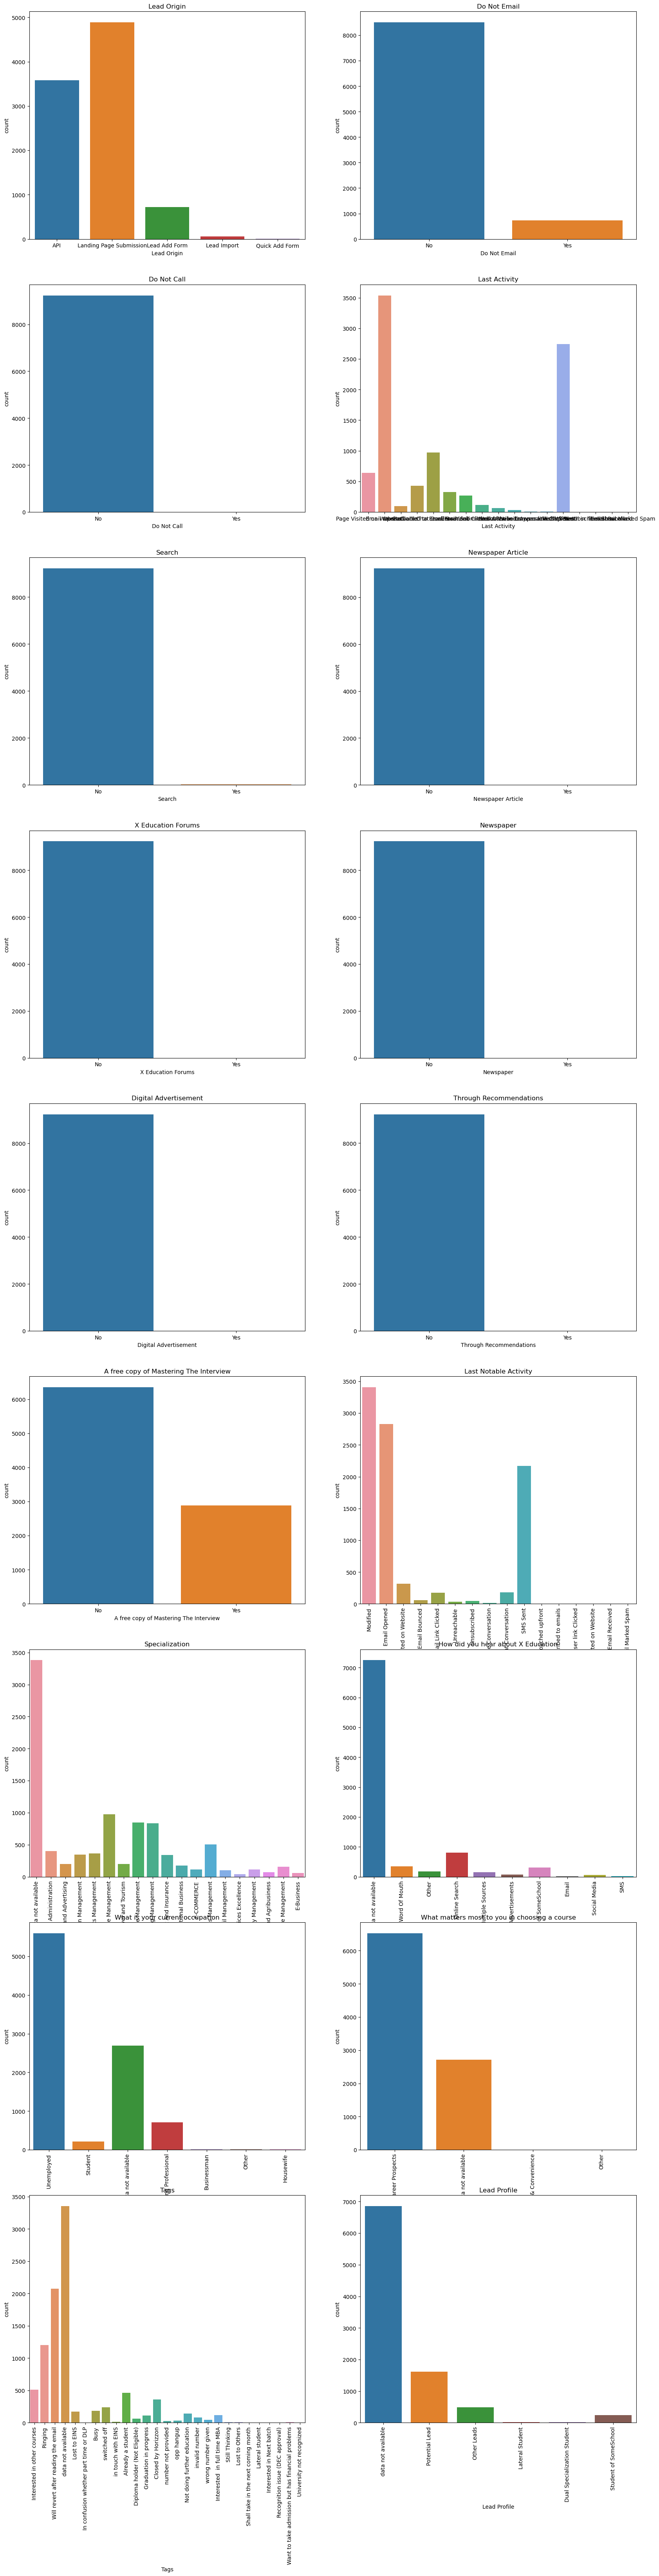

In [32]:
# Univariate analysis on Categorical Variables
plt.figure(figsize = (20,80))

plt.subplot(9,2,1)
sns.countplot(data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(9,2,2)
sns.countplot(data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(9,2,3)
sns.countplot(data['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(9,2,4)
sns.countplot(data['Last Activity'])
plt.title('Last Activity')

plt.subplot(9,2,5)
sns.countplot(data['Search'])
plt.title('Search')

plt.subplot(9,2,6)
sns.countplot(data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(9,2,7)
sns.countplot(data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(9,2,8)
sns.countplot(data['Newspaper'])
plt.title('Newspaper')

plt.subplot(9,2,9)
sns.countplot(data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(9,2,10)
sns.countplot(data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(9,2,11)
sns.countplot(data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(9,2,12)
sns.countplot(data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(9,2,13)
sns.countplot(data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(9,2,14)
sns.countplot(data['How did you hear about X Education']).tick_params(axis='x', rotation = 90)
plt.title('How did you hear about X Education')

plt.subplot(9,2,15)
sns.countplot(data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(9,2,16)
sns.countplot(data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(9,2,17)
sns.countplot(data['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')

plt.subplot(9,2,18)
sns.countplot(data['Lead Profile']).tick_params(axis='x', rotation = 90)
plt.title('Lead Profile')

plt.show()

In [33]:
# 1. Most lead origined from the landing page
# 2. last noticiable activity were modified, mail opened or sms sent
# 3. Data is not available at most of the places in Specialization and where did you hear about x education columns
# 4. Most of the individuals applying for thr course are unemployed and are looking for a better course prospect
# 5. Data is not available for most of the lead profiles

In [34]:
# The following columns have the Data which is highly skewed. So, let's drop them.
#'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Newspaper Article','Digital Advertisement',
#'Through Recommendations''What matters most to you in choosing a course', 'Lead Profile', "A free copy of Mastering The Interview
# "tags"

In [35]:
data.drop(['Do Not Call','Search',
               'Newspaper Article',
               'X Education Forums',
               'Newspaper','Digital Advertisement',
               'Through Recommendations',
               'A free copy of Mastering The Interview', 'Tags', 'Lead Profile', 'What matters most to you in choosing a course', 'How did you hear about X Education' ],axis=1,inplace=True)

In [36]:
#remaining columns
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

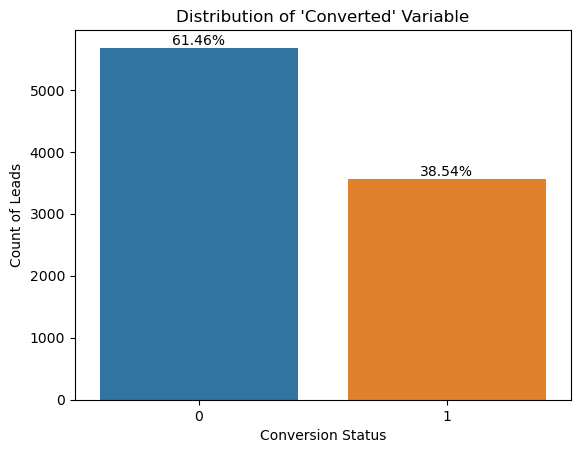

In [37]:
# Y variable
ax = sns.countplot(data.Converted)
plt.xlabel("Conversion Status")
plt.ylabel("Count of Leads")
plt.title("Distribution of 'Converted' Variable")
total = len(data['Converted'])

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()


In [38]:
# Conversion rate is currently 38.5%

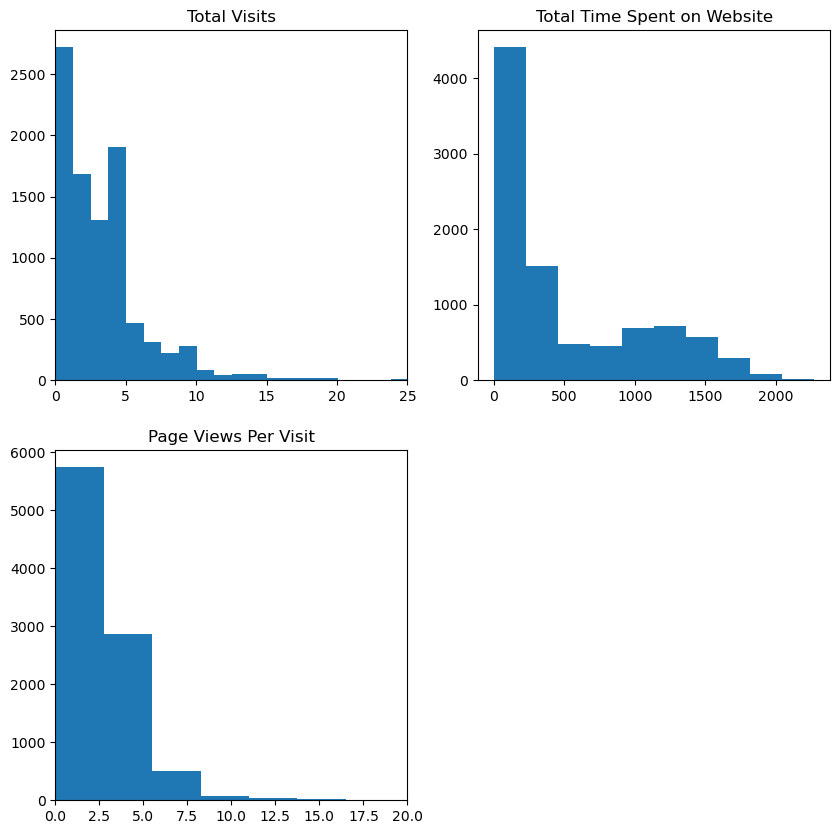

In [39]:
#plotting numerical variables
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [40]:
# function to create countplot for Univariate Analysis-Categorical Columns
def uni_countplot(variable,  log_y=False, rot_ticks=False):
    plt.figure(figsize = [10,7])
    palt = sns.color_palette("bright")
    
    plt.title("Count plot of {}".format(variable), color='blue', fontweight=15, fontsize=15)
    ax1 = sns.countplot(x = variable, data = data, order = sorted(data[variable].unique(), reverse = True), palette = palt)
    total = len(data[variable])
    
            
    # We can use Logarithmic Scale if the plot isn't readable
    if log_y:
        plt.yscale('log')
        plt.ylabel('Count on log Scale')
        

    # Let's rotate x-ticks whenever it is required.
    if rot_ticks:
        plt.xticks(rotation=90)
        plt.xlabel('')

    for p in ax1.patches: 
        percentage='{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax1.annotate(percentage,(x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

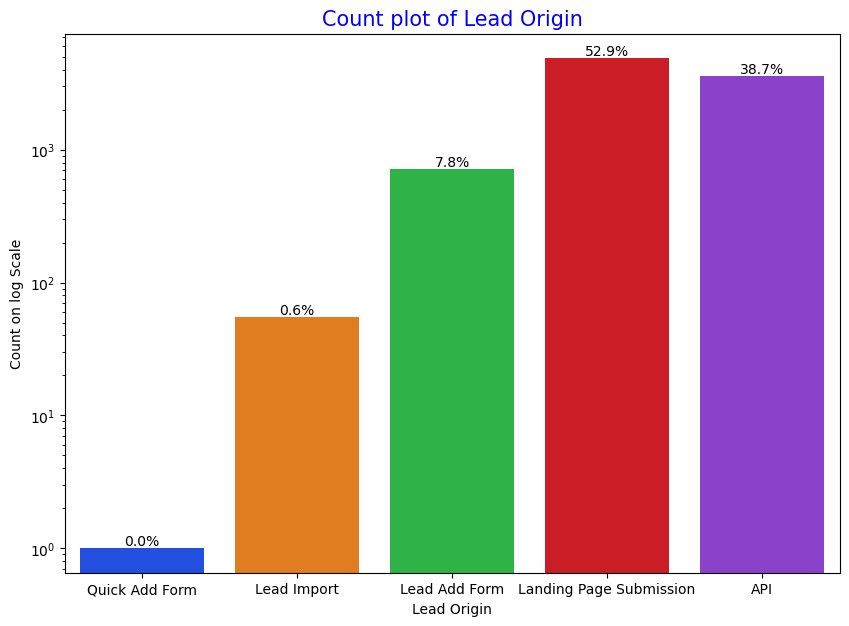

In [41]:
#plot for lead origin
uni_countplot('Lead Origin', True)

In [42]:
#most leads are converted when thet come from a landing page or an API

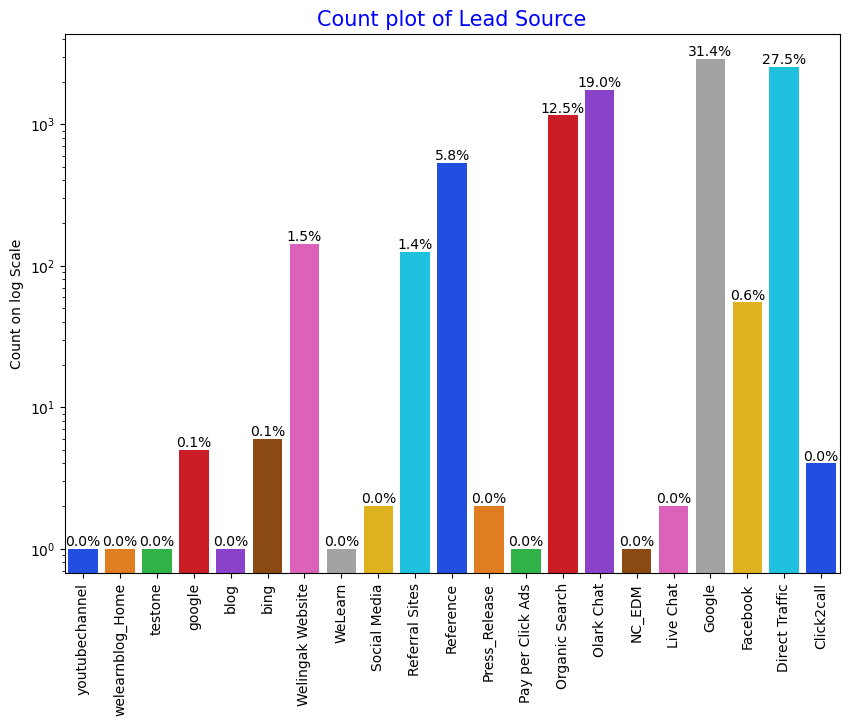

In [43]:
#plot for lead source
uni_countplot('Lead Source', True, True)

In [44]:
#google and direct traffic have the highest conversion

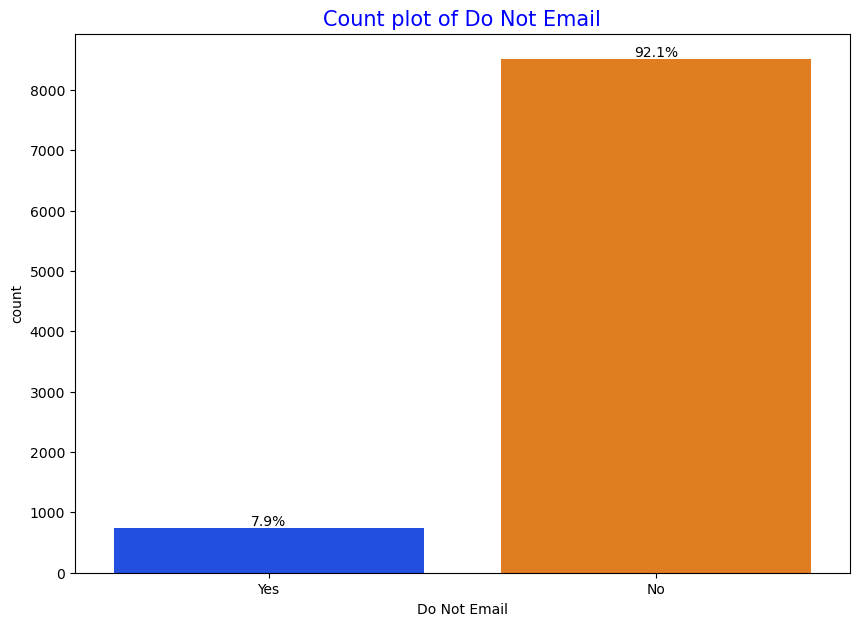

In [45]:
#plot for do not email
uni_countplot('Do Not Email')

In [46]:
# Majority are converted when they opt for no

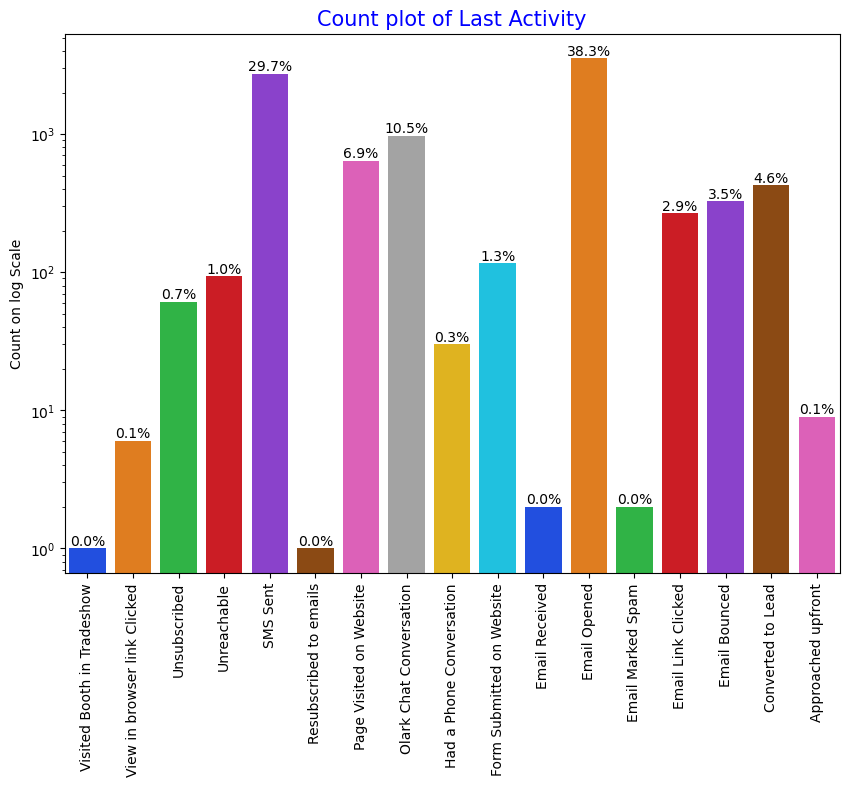

In [47]:
#plot for last activity
uni_countplot('Last Activity', True, True)

In [48]:
#major conversions from email opened and sms sent

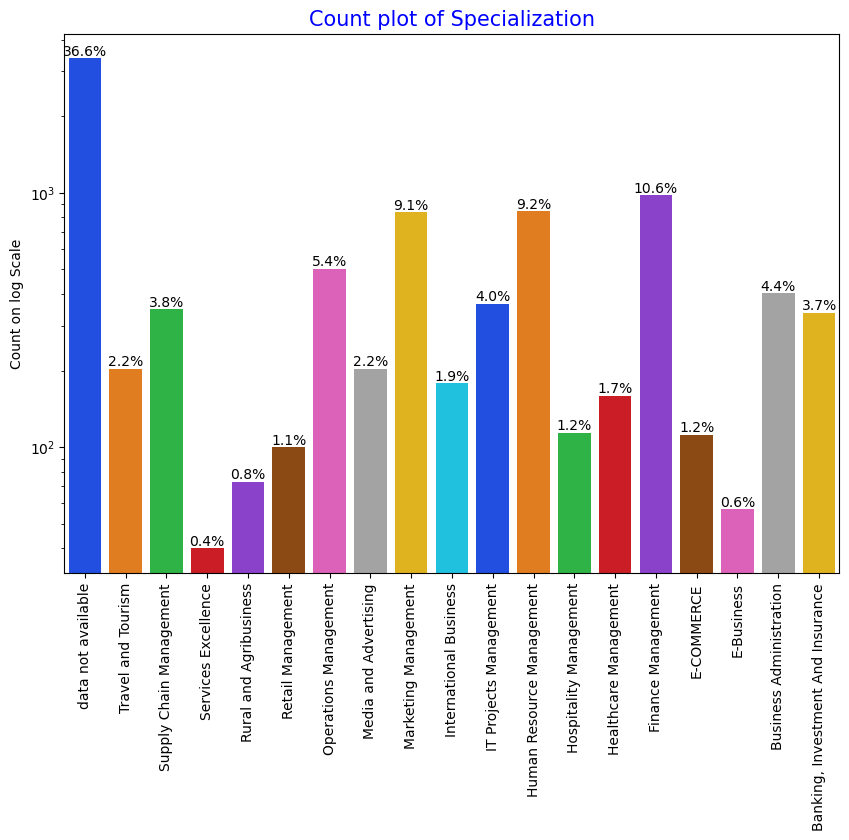

In [49]:
#plot for specialization
uni_countplot('Specialization', True, True)

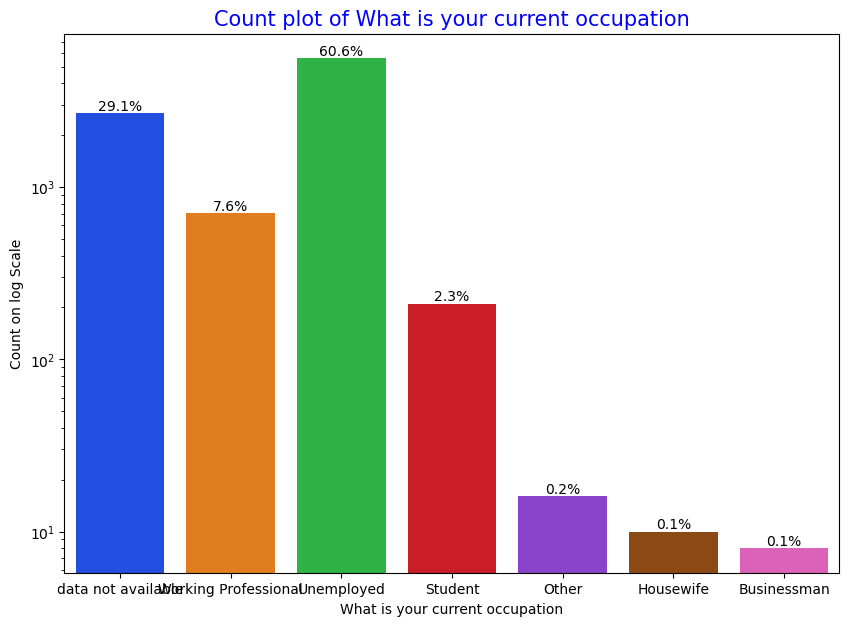

In [50]:
#plot for current oppucation
uni_countplot('What is your current occupation', True)

In [51]:
#highest conversion from unemployed people

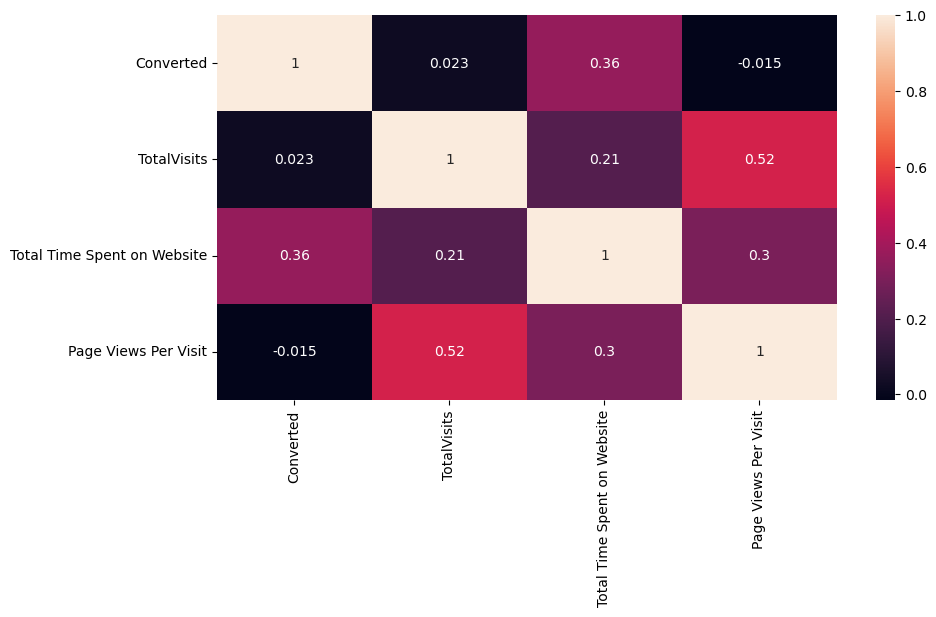

In [52]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [53]:
#no high correlation seen between variables

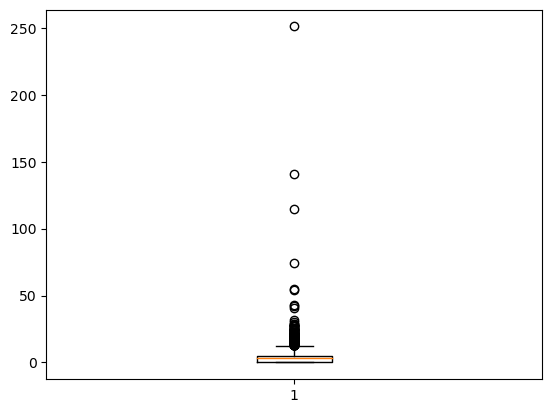

In [54]:
#Checking for outliers
plt.boxplot(data.TotalVisits)
plt.show()

In [55]:
# #removing outliers

# Q3 = data.TotalVisits.quantile(0.99)
# data = data[(data.TotalVisits <= Q3)]
# Q1 = data.TotalVisits.quantile(0.01)
# data = data[(data.TotalVisits >= Q1)]
# sns.boxplot(y=data['TotalVisits'])
# plt.show()

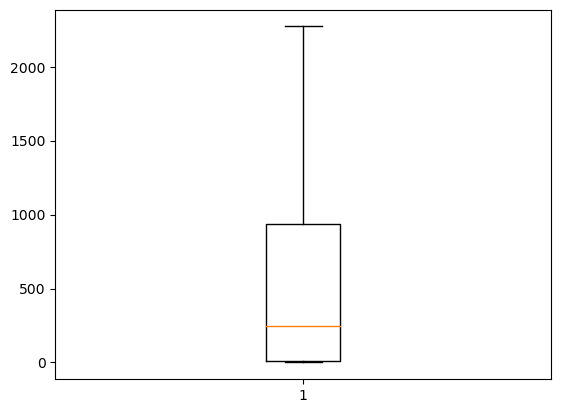

In [56]:
#Checking for outliers
plt.boxplot(data["Total Time Spent on Website"])
plt.show()

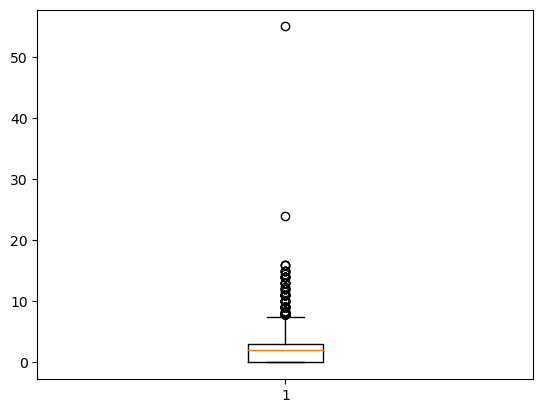

In [57]:
#Checking for outliers
plt.boxplot(data["Page Views Per Visit"])
plt.show()

In [58]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [59]:
# Creating dummy variables using the 'get_dummies'
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
data = pd.concat([data, dummy], axis=1)
data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,data not available,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,data not available,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,data not available,Unemployed,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,data not available,...,0,0,0,0,0,0,1,0,0,0


In [60]:
data = data.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Last Notable Activity'], 1)
data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
num_list = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

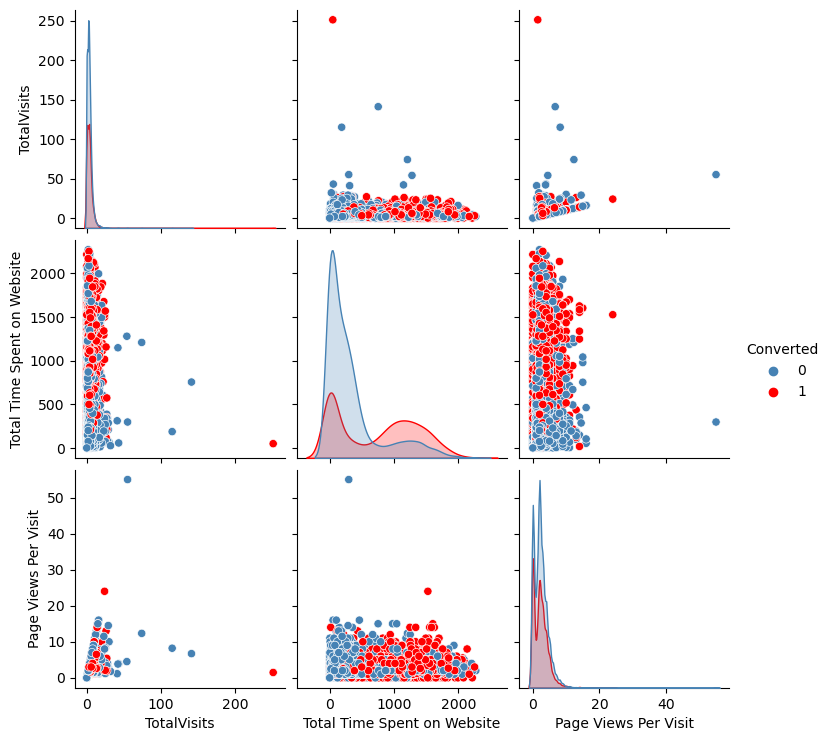

In [62]:
#Analysing the numerical variables
sns.pairplot(data, vars = num_list,
             diag_kind = 'kde', hue = 'Converted', palette =['steelblue', 'red'])
plt.show()

### Train-Test Split

In [63]:
# Import the library
from sklearn.model_selection import train_test_split

In [64]:
X = data.drop(['Converted'], 1)

In [65]:
y = data['Converted']

In [66]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
# Checking the shapes
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 83)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 83)
 Shape of y_test is  :  (2772,)


### Feature Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,0.013633,0.212974,0.042130,0.528139,0.079468,0.005102,0.000155,0.271490,0.005102,0.320037,...,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,0.021115,0.240566,0.039668,0.499246,0.270489,0.071252,0.012434,0.444763,0.071252,0.466527,...,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.005282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.011952,0.108275,0.036364,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.019920,0.407790,0.054545,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Model Building

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [71]:
# Import RFE
from sklearn.feature_selection import RFE

In [72]:
# Running RFE with 15 variables as output
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [73]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,TotalVisits,True,1
80,Last Notable Activity_Unreachable,True,1
20,Lead Source_Welingak Website,True,1
35,Last Activity_Had a Phone Conversation,True,1
39,Last Activity_SMS Sent,True,1
...,...,...,...
60,Specialization_Travel and Tourism,False,65
45,Specialization_E-Business,False,66
54,Specialization_Media and Advertising,False,67
24,Lead Source_testone,False,68


In [74]:
# Putting all the columns selected by RFE in the variable 'column'
column = X_train.columns[rfe.support_]

In [75]:
X_train = X_train[column]

In [76]:
# Importing statsmodels
import statsmodels.api as sm

In [77]:
#funciton for calculatinf VIF
def vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [78]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def model(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    return res.summary()

In [80]:
#model iter 1
model(column)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.6
Date:                Mon, 07 Aug 2023   Deviance:                       5291.1
Time:                        12:26:33   Pearson chi2:                 7.30e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4616      0.138    -10.619      0.000      -1.731      -1.192
TotalVisits                                              7.0909      1.906      3.721      0.000       3.356      10.826
Total Time Spent on Website                              4.4494      0.165     26.899      0.000       4.125       4.774
Lead Origin_Landing Page Submission                     -0.9875      0.127     -7.764      0.000      -1.237      -0.738
Lead Origin_Lead Add Form                                3.0197      0.205     14.711      0.000       2.617       3.422
Lead Source_Olark Chat                                   1.0907      0.123      8.883      0.000       0.850       1.331
Lead Source_Welingak Website                             2.4491      0.746      3.281      0.001       0.986       3.912
Do Not Email_Yes                                        -1.3293      0.167     -7.950      0.000      -1.657      -1.002
Last Activity_Had a Phone Conversation                   0.6922      0.972      0.712      0.477      -1.214       2.598
Last Activity_SMS Sent                                   1.4601      0.074     19.805      0.000       1.316       1.605
Specialization_data not available                       -0.9612      0.122     -7.894      0.000      -1.200      -0.723
What is your current occupation_Housewife               22.9306   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Working Professional     2.4314      0.190     12.765      0.000       2.058       2.805
What is your current occupation_data not available      -1.1375      0.087    -13.070      0.000      -1.308      -0.967
Last Notable Activity_Had a Phone Conversation           2.8946      1.495      1.936      0.053      -0.036       5.826
Last Notable Activity_Unreachable                        2.0542      0.550      3.735      0.000       0.976       3.132
========================================================================================================================
"""

In [81]:
vif(column)

                                             Features   VIF
2                 Lead Origin_Landing Page Submission  2.47
9                   Specialization_data not available  2.35
7              Last Activity_Had a Phone Conversation  2.02
13     Last Notable Activity_Had a Phone Conversation  2.01
1                         Total Time Spent on Website  1.97
4                              Lead Source_Olark Chat  1.81
12  What is your current occupation_data not avail...  1.59
0                                         TotalVisits  1.56
8                              Last Activity_SMS Sent  1.50
3                           Lead Origin_Lead Add Form  1.43
5                        Lead Source_Welingak Website  1.27
11  What is your current occupation_Working Profes...  1.21
6                                    Do Not Email_Yes  1.11
10          What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.00


In [82]:
# Dropping 'Current occupation_Housewife' column
X_train.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

In [83]:
column = X_train.columns

In [84]:
#model iter 2
model(column)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.6
Date:                Mon, 07 Aug 2023   Deviance:                       5305.1
Time:                        12:26:33   Pearson chi2:                 7.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4517      0.137    -10.558      0.000      -1.721      -1.182
TotalVisits                                              6.9841      1.900      3.676      0.000       3.260      10.708
Total Time Spent on Website                              4.4452      0.165     26.906      0.000       4.121       4.769
Lead Origin_Landing Page Submission                     -0.9821      0.127     -7.727      0.000      -1.231      -0.733
Lead Origin_Lead Add Form                                3.0333      0.205     14.796      0.000       2.632       3.435
Lead Source_Olark Chat                                   1.0881      0.123      8.868      0.000       0.848       1.329
Lead Source_Welingak Website                             2.4335      0.746      3.261      0.001       0.971       3.896
Do Not Email_Yes                                        -1.3344      0.167     -7.983      0.000      -1.662      -1.007
Last Activity_Had a Phone Conversation                   0.6850      0.973      0.704      0.481      -1.222       2.592
Last Activity_SMS Sent                                   1.4518      0.074     19.714      0.000       1.307       1.596
Specialization_data not available                       -0.9651      0.122     -7.931      0.000      -1.204      -0.727
What is your current occupation_Working Professional     2.4223      0.190     12.723      0.000       2.049       2.796
What is your current occupation_data not available      -1.1414      0.087    -13.125      0.000      -1.312      -0.971
Last Notable Activity_Had a Phone Conversation           2.8916      1.496      1.933      0.053      -0.040       5.823
Last Notable Activity_Unreachable                        2.0464      0.550      3.720      0.000       0.968       3.124
========================================================================================================================
"""

In [85]:
vif(column)

                                             Features   VIF
2                 Lead Origin_Landing Page Submission  2.46
9                   Specialization_data not available  2.35
7              Last Activity_Had a Phone Conversation  2.02
12     Last Notable Activity_Had a Phone Conversation  2.01
1                         Total Time Spent on Website  1.96
4                              Lead Source_Olark Chat  1.81
11  What is your current occupation_data not avail...  1.59
0                                         TotalVisits  1.56
8                              Last Activity_SMS Sent  1.50
3                           Lead Origin_Lead Add Form  1.43
5                        Lead Source_Welingak Website  1.27
10  What is your current occupation_Working Profes...  1.21
6                                    Do Not Email_Yes  1.11
13                  Last Notable Activity_Unreachable  1.00


In [86]:
#dropping Last Activity_Had a Phone Conversation due to high  p value and columns with data not available
X_train.drop(['Last Activity_Had a Phone Conversation','What is your current occupation_data not available','Specialization_data not available'],axis=1,inplace=True)
column = X_train.columns

In [87]:
#model iter 3
model(column)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.0
Date:                Mon, 07 Aug 2023   Deviance:                       5596.0
Time:                        12:26:34   Pearson chi2:                 7.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5669      0.098    -26.222      0.000      -2.759      -2.375
TotalVisits                                              8.1978      2.033      4.032      0.000       4.213      12.183
Total Time Spent on Website                              4.5585      0.161     28.286      0.000       4.243       4.874
Lead Origin_Landing Page Submission                     -0.2067      0.086     -2.391      0.017      -0.376      -0.037
Lead Origin_Lead Add Form                                3.7280      0.200     18.647      0.000       3.336       4.120
Lead Source_Olark Chat                                   0.9208      0.116      7.912      0.000       0.693       1.149
Lead Source_Welingak Website                             1.9528      0.744      2.625      0.009       0.495       3.411
Do Not Email_Yes                                        -1.4052      0.164     -8.554      0.000      -1.727      -1.083
Last Activity_SMS Sent                                   1.4608      0.072     20.331      0.000       1.320       1.602
What is your current occupation_Working Professional     2.8692      0.186     15.467      0.000       2.506       3.233
Last Notable Activity_Had a Phone Conversation           3.7212      1.099      3.385      0.001       1.567       5.876
Last Notable Activity_Unreachable                        1.9943      0.514      3.882      0.000       0.987       3.001
========================================================================================================================
"""

In [88]:
vif(column)

                                             Features   VIF
2                 Lead Origin_Landing Page Submission  2.12
1                         Total Time Spent on Website  1.83
0                                         TotalVisits  1.51
7                              Last Activity_SMS Sent  1.46
3                           Lead Origin_Lead Add Form  1.39
5                        Lead Source_Welingak Website  1.24
8   What is your current occupation_Working Profes...  1.18
6                                    Do Not Email_Yes  1.09
4                              Lead Source_Olark Chat  1.04
9      Last Notable Activity_Had a Phone Conversation  1.00
10                  Last Notable Activity_Unreachable  1.00


In [89]:
#this is a good model, all p values are less than 0.05 and vif is less than 5

### Model Prediction

In [90]:
X_train = X_train[column]

X_train_sm = sm.add_constant(X_train)

# Creating a final model
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()  

logm.params

const                                                  -2.566947
TotalVisits                                             8.197814
Total Time Spent on Website                             4.558491
Lead Origin_Landing Page Submission                    -0.206733
Lead Origin_Lead Add Form                               3.728021
Lead Source_Olark Chat                                  0.920849
Lead Source_Welingak Website                            1.952804
Do Not Email_Yes                                       -1.405238
Last Activity_SMS Sent                                  1.460788
What is your current occupation_Working Professional    2.869227
Last Notable Activity_Had a Phone Conversation          3.721195
Last Notable Activity_Unreachable                       1.994265
dtype: float64

In [91]:
#making prediction
y_train_pred = logm.predict(X_train_sm)

In [92]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16163696, 0.15896737, 0.21923684, 0.78889144, 0.16163696,
       0.99099168, 0.08513692, 0.99111508, 0.28923779, 0.89357516])

In [93]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final

,Converted,Conversion_Prob
0,0,0.161637
1,0,0.158967
2,0,0.219237
3,0,0.788891
4,0,0.161637
...,...,...
6463,1,0.761528
6464,1,0.995700
6465,1,0.161637
6466,0,0.097015


In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final

,Converted,Conversion_Prob,Predicted
0,0,0.161637,0
1,0,0.158967,0
2,0,0.219237,0
3,0,0.788891,1
4,0,0.161637,0
...,...,...,...
6463,1,0.761528,1
6464,1,0.995700,1
6465,1,0.161637,0
6466,0,0.097015,0


### Model Evaluation

In [95]:
# Importing metrics
from sklearn import metrics

In [96]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3576,  426],
       [ 885, 1581]], dtype=int64)

In [97]:
#accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7973098330241187

In [98]:
#true positive
TP = confusion[1,1]
#true negatives
TN = confusion[0,0]
#false positives
FP = confusion[0,1] 
#false negatives
FN = confusion[1,0]

In [99]:
#sensitivity
TP/(TP+FN)

0.6411192214111923

In [100]:
#specificity
TN/(TN+FP)

0.8935532233883059

In [101]:
#ROC Curve
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

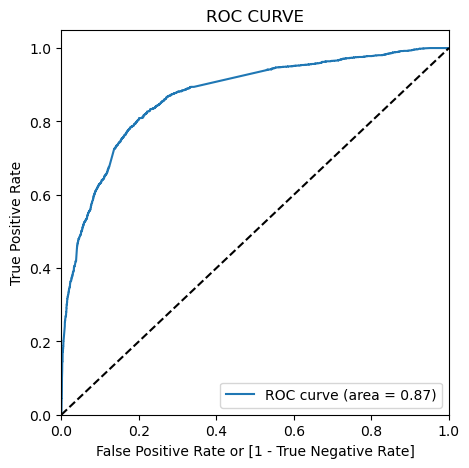

In [103]:
# drawing the curve
roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.161637,0,1,1,0,0,0,0,0,0,0,0
1,0,0.158967,0,1,1,0,0,0,0,0,0,0,0
2,0,0.219237,0,1,1,1,0,0,0,0,0,0,0
3,0,0.788891,1,1,1,1,1,1,1,1,1,0,0
4,0,0.161637,0,1,1,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec[1], rec[1]]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  Precision    Recall
0.0   0.0  0.381262     1.000000     0.000000   1.000000  0.000000
0.1   0.1  0.540353     0.969992     0.275612   0.452088  0.969992
0.2   0.2  0.765615     0.881995     0.693903   0.639706  0.881995
0.3   0.3  0.794372     0.833333     0.770365   0.690989  0.833333
0.4   0.4  0.808287     0.756285     0.840330   0.744808  0.756285
0.5   0.5  0.797310     0.641119     0.893553   0.787743  0.641119
0.6   0.6  0.790353     0.577048     0.921789   0.819700  0.577048
0.7   0.7  0.778139     0.504055     0.947026   0.854296  0.504055
0.8   0.8  0.746444     0.381590     0.971264   0.891098  0.381590
0.9   0.9  0.715523     0.273317     0.988006   0.933518  0.273317


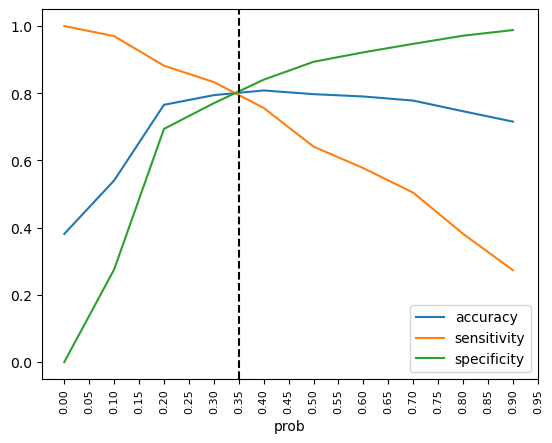

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.35, color='black', linestyle='--')
plt.xticks(rotation = 90)
plt.show()

In [107]:
#from the graph we can see that optimum cutoff is 0.445
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.161637,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.158967,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.219237,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.788891,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.161637,0,1,1,0,0,0,0,0,0,0,0,0


In [108]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8039579468150897

In [109]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3242,  760],
       [ 508, 1958]], dtype=int64)

In [110]:
#true positive
TP = confusion[1,1]
#true negatives
TN = confusion[0,0]
#false positives
FP = confusion[0,1] 
#false negatives
FN = confusion[1,0]

In [111]:
#sensitivity
TP/(TP+FN)

0.6411192214111923

In [112]:
#specificity
TN/(TN+FP)

0.8935532233883059

In [113]:
# Let's assign Lead_score to the Train Data Set
y_train_pred_final['lead_score']=(y_train_pred_final['Conversion_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Conversion_Prob',ascending=False)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
3115,1,0.999438,1,1,1,1,1,1,1,1,1,1,1,1,99
146,1,0.999422,1,1,1,1,1,1,1,1,1,1,1,1,99
4891,1,0.999352,1,1,1,1,1,1,1,1,1,1,1,1,99
2888,1,0.999031,1,1,1,1,1,1,1,1,1,1,1,1,99
6312,1,0.999026,1,1,1,1,1,1,1,1,1,1,1,1,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,0,0.016899,0,1,0,0,0,0,0,0,0,0,0,0,1
5246,0,0.016724,0,1,0,0,0,0,0,0,0,0,0,0,1
3580,0,0.016150,0,1,0,0,0,0,0,0,0,0,0,0,1
6361,0,0.016109,0,1,0,0,0,0,0,0,0,0,0,0,1


# Predicting on test data

In [114]:
# Scaling numeric values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0.031873,18.381818,0.003521,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0.019920,1.072727,0.002201,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X_test = X_test[column]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4269,0.031873,18.381818,0,0,0,0,0,1,0,0,0
2376,0.000000,0.000000,0,1,0,0,0,1,0,0,0
7766,0.019920,1.072727,0,0,0,0,0,0,1,0,1
9199,0.000000,0.000000,0,0,1,0,0,0,0,0,0
4359,0.000000,0.000000,0,1,0,0,0,0,0,0,0


In [116]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [117]:
# Predicting the final test model 
y_test_pred = logm.predict(X_test_sm)

y_test_pred[:10]

4269    1.000000
2376    0.932255
7766    0.999358
9199    0.161637
4359    0.761528
9186    1.000000
1631    1.000000
8963    1.000000
8007    1.000000
5324    0.999994
dtype: float64

In [118]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4269,1.000000
2376,0.932255
7766,0.999358
9199,0.161637
4359,0.761528


In [119]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [120]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,1,0.932255
2,1,0.999358
3,0,0.161637
4,1,0.761528


In [121]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Conversion_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Conversion_Prob',ascending=False)

,Converted,Conversion_Prob,lead_score
0,1,1.00000,100
731,0,1.00000,100
2237,1,1.00000,100
2233,0,1.00000,100
2232,1,1.00000,100
...,...,...,...
2721,0,0.04516,4
1366,0,0.04516,4
2250,0,0.04516,4
2558,0,0.04516,4


In [122]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,lead_score,final_predicted
0,1,1.000000,100,1
1,1,0.932255,93,1
2,1,0.999358,99,1
3,0,0.161637,16,0
4,1,0.761528,76,1


In [123]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 395, 1282],
       [  60, 1035]], dtype=int64)

In [124]:
#true positive
TP = confusion2[1,1]
#true negatives
TN = confusion2[0,0]
#false positives
FP = confusion2[0,1] 
#false negatives
FN = confusion2[1,0]

In [125]:
#sensitivity
TP/(TP+FN)

0.9452054794520548

In [126]:
#specificity
TN/(TN+FP)

0.2355396541443053

In [127]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3576,  426],
       [ 885, 1581]], dtype=int64)

In [128]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7877428998505231

In [129]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6411192214111923

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

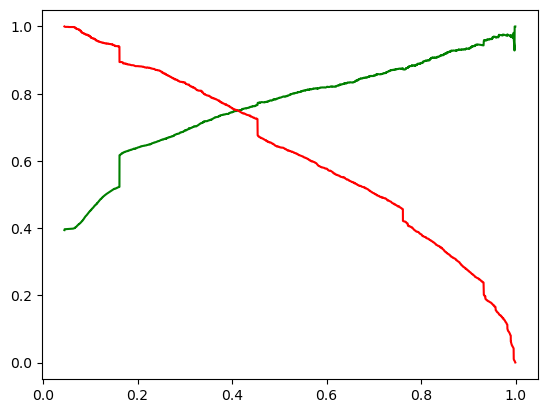

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.161637,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.158967,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.219237,0,1,1,1,0,0,0,0,0,0,0,0,21
3,0,0.788891,1,1,1,1,1,1,1,1,1,0,0,1,78
4,0,0.161637,0,1,1,0,0,0,0,0,0,0,0,0,16


In [133]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8095238095238095

In [134]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3383,  619],
       [ 613, 1853]], dtype=int64)

In [135]:
#true positive
TP = confusion2[1,1]
#true negatives
TN = confusion2[0,0]
#false positives
FP = confusion2[0,1] 
#false negatives
FN = confusion2[1,0]

In [136]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7495954692556634

In [137]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.751419302514193

# Top Predictors

In [138]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
top_predictors = logm.params[1:]
top_predictors.sort_values(ascending = False)

TotalVisits                                             8.20
Total Time Spent on Website                             4.56
Lead Origin_Lead Add Form                               3.73
Last Notable Activity_Had a Phone Conversation          3.72
What is your current occupation_Working Professional    2.87
Last Notable Activity_Unreachable                       1.99
Lead Source_Welingak Website                            1.95
Last Activity_SMS Sent                                  1.46
Lead Source_Olark Chat                                  0.92
Lead Origin_Landing Page Submission                    -0.21
Do Not Email_Yes                                       -1.41
dtype: float64

## Insights

## Top Predictors to our model
##### TotalVisits                                            
##### Total Time Spent on Website                      
##### Lead Origin_Lead Add Form
##### Last Notable Activity_Had a Phone Conversation   
##### What is your current occupation_Working Professional



## Negative influencers
#### Do not email yes
#### lead origin_landing page submission
